<a href="https://colab.research.google.com/github/Taylor-X01/Optimization-Algorithms/blob/main_project/Line_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from sympy import *
from sympy.abc import x,y
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [38]:
def plot(f,lb,ub,points_x=None,points_y=None):

  f_lambda = lambdify(x,f)

  fig = plt.figure(figsize=(30, 10))
  X = np.linspace(lb, ub, 5500)
  ax = fig.gca()

  plt.plot(X,f_lambda(X))
  if (points_x != None) or (points_y != None):
    plt.plot(points_x,points_y,'xr',ms=10)
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
  plt.minorticks_on()
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

  plt.show()

## Bissection Method

$$
Let\ f:\mathbb{R}\rightarrow\mathbb{R}\ and\ a<b \in\mathbb{R} : f'(a) \times f'(b)<0\\
  \  
$$

In [39]:
def bissection(fct,a,b,err=0.05, verbose=False):
  print("Function :",fct)
  fct_prime = fct.diff(x)
  f_prime = lambdify(x,fct_prime)
  f = lambdify(x,fct)
  f_a = f_prime(a)
  f_b = f_prime(b)
  result = [[a,b],[f(a),f(b)]]
  if f_a*f_b<0:
    print("Success")
    while (abs(b-a)>err) and (f_prime(a)<0 and f_prime(b)>0):
      c = (a+b)/2
      result[0].append(c)
      result[1].append(f(c))
      if verbose:
        print("c = ",c)
      f_c = f_prime(c)
      if verbose:
        print("f'(c) = ",f_c)
      if f_c <= 0 : a = c
      else: b = c
    if verbose:  
      print("2D: [x,f(x)] == ",[a,f(a)])
    return result
  else: print("Failed")


### Test functions :
$$
f(x)=x^2+5x+2
$$

Function : x**2 + 5*x + 2
Success
[[-20, 20, 0.0, -10.0, -5.0, -2.5], [302, 502, 2.0, 52.0, 2.0, -4.25]]
[x*,f(x*)] [-2.5, -4.25]


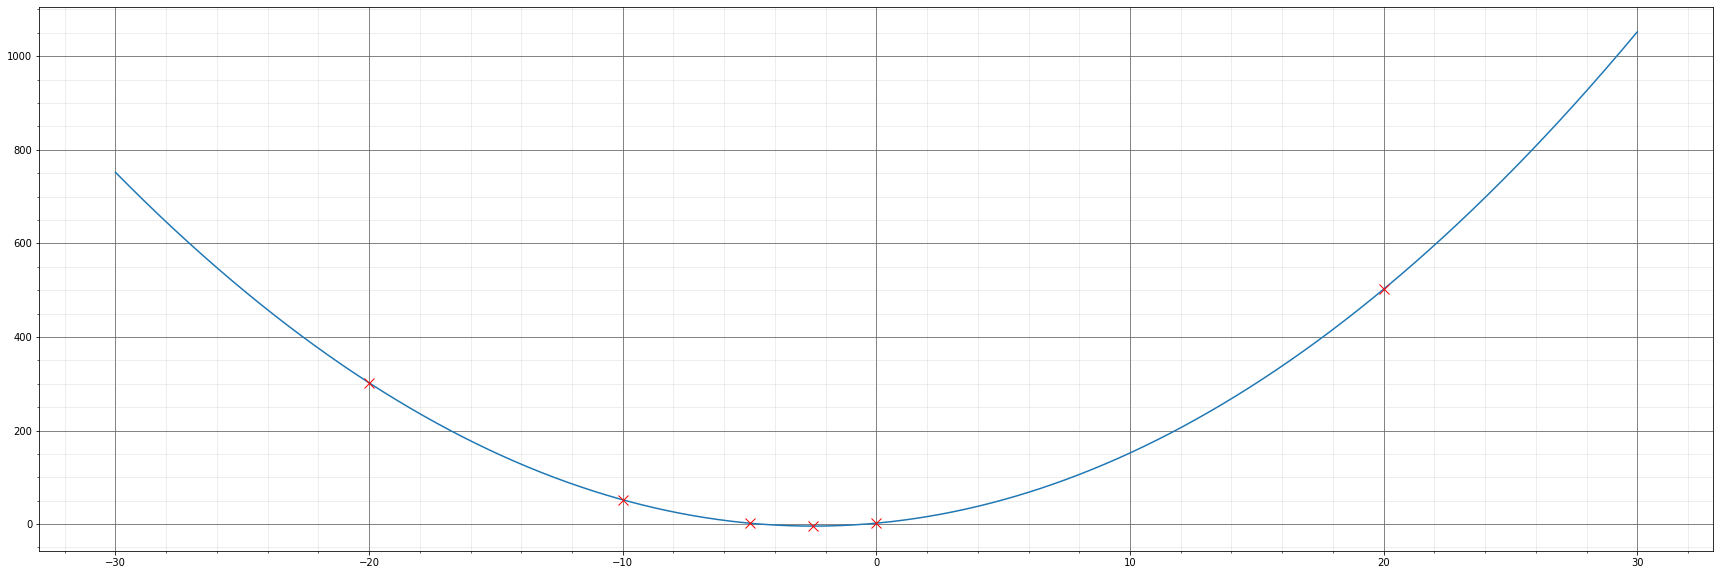

In [40]:

f1 = (x**2+5*x+2)

results = bissection(f1,-20,20,0.02)
print(results)
print("[x*,f(x*)]",[results[0][-1],results[1][-1]])
plot(f1,-30,30,results[0],results[1])



## Secant Method

$$
Secant's\ Method\ :\ x_{k+1}=x_{k}-\frac{f(x_k)}{ \left[ \frac{f(x_k)-f(x_{k-1})}{x_k - x_{k-1}}\right]}\\
To\ find\ the\ minimal\ point\ of\ the\ function\ f:\mathbb{R}\rightarrow \mathbb{R}\\
x_{k+1}=x_{k}-\frac{f'(x_k)}{ \left[ \frac{f'(x_k)-f'(x_{k-1})}{f(x_k) - f(x_{k-1})}\right]}
$$

In [41]:
def secant(fct,x0,x1,err=0.005):
  print("Function :",fct)
  fct_prime = fct.diff(x)
  print(fct_prime)

  x_k = x1
  x_k_1 = x0

  f_prime = lambdify(x,fct_prime)
  f = lambdify(x,fct)

  f_prime_xk = f_prime(x_k)
  f_prime_xk_1 = f_prime(x_k_1) 

  while (abs(x_k - x_k_1) > err) and (abs(f_prime_xk) > err):

    x_k1 = x_k-(f_prime_xk/ ( (f_prime_xk-f_prime_xk_1)/(f(x_k) - f(x_k_1)) ) )
    x_k_1 = x_k
    x_k = x_k1
    print("x_k: ",x_k)
    print("x_k-1: ",x_k_1)
    f_prime_xk = f_prime(x_k)
    f_prime_xk_1 = f_prime(x_k_1)
    print("f_prime_xk : ",f_prime_xk)
    print("f_prime_xk-1 : ",f_prime_xk_1) 


  if abs(f_prime_xk) < err:
    print([x_k,f(x_k)])
    return [x_k,f(x_k)]
  print("ERREUR DE CALCUL")



Function : sin(cos(exp(x)))
-exp(x)*sin(exp(x))*cos(cos(exp(x)))
x_k:  1.014266620586147
x_k-1:  1.5
f_prime_xk :  -0.6203585882299758
f_prime_xk-1 :  4.249391619043998
x_k:  1.087286531764382
x_k-1:  1.014266620586147
f_prime_xk :  -0.2862789007261139
f_prime_xk-1 :  -0.6203585882299758
x_k:  1.0588247351590498
x_k-1:  1.087286531764382
f_prime_xk :  -0.4187667123567471
f_prime_xk-1 :  -0.2862789007261139
x_k:  1.027082132335586
x_k-1:  1.0588247351590498
f_prime_xk :  -0.5629354975188726
f_prime_xk-1 :  -0.4187667123567471
x_k:  0.9662124466465682
x_k-1:  1.027082132335586
f_prime_xk :  -0.831648728263929
f_prime_xk-1 :  -0.5629354975188726
x_k:  0.83468381219434
x_k-1:  0.9662124466465682
f_prime_xk :  -1.3425363331461961
f_prime_xk-1 :  -0.831648728263929
x_k:  0.4549477907865735
x_k-1:  0.83468381219434
f_prime_xk :  -1.5760469100021146
f_prime_xk-1 :  -1.3425363331461961
x_k:  -3.6969596933373423
x_k-1:  0.4549477907865735
f_prime_xk :  -0.00033240061180811453
f_prime_xk-1 :  -1.

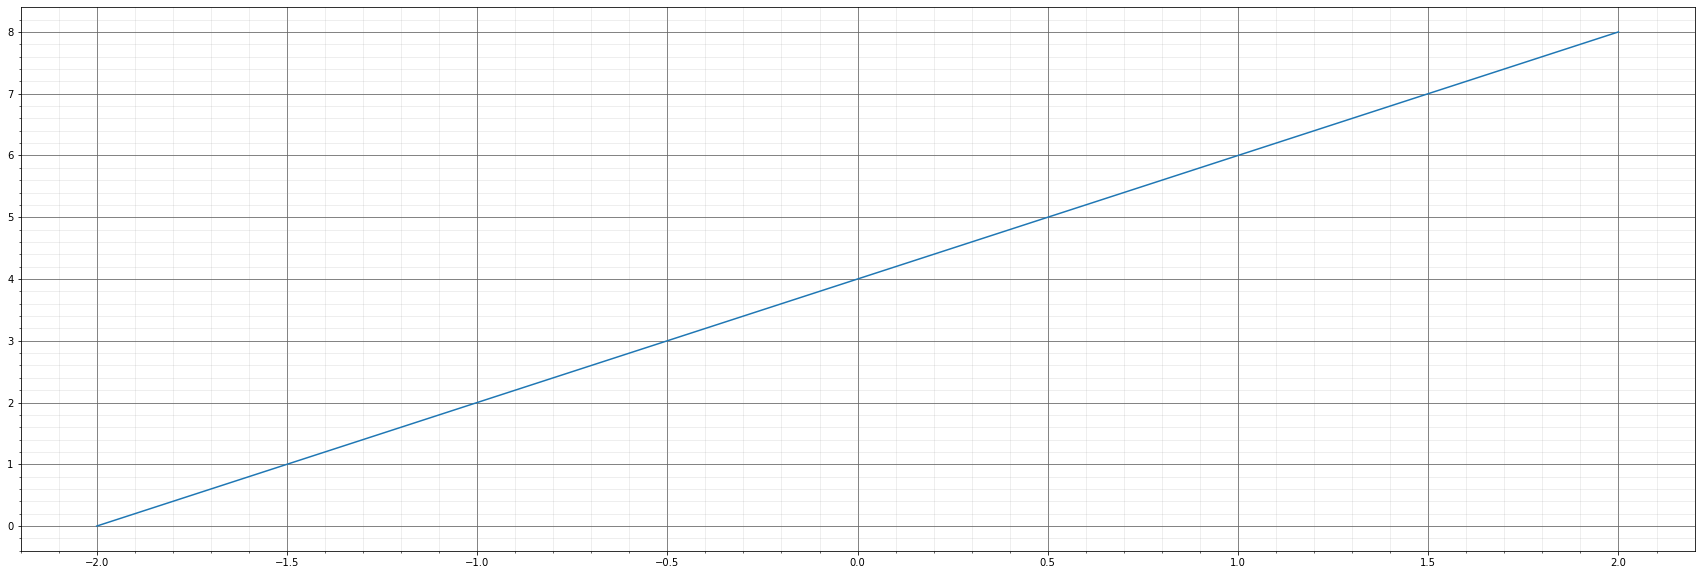

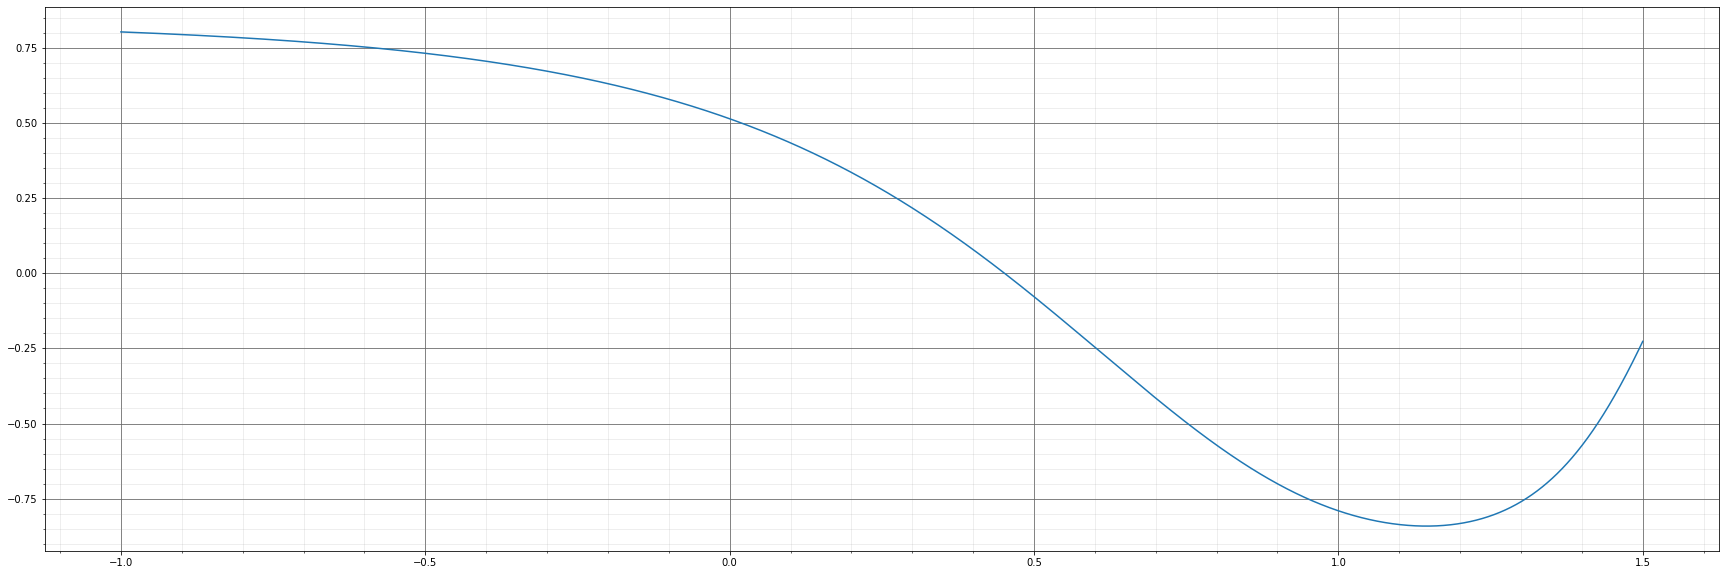

In [42]:
f4 = sin(cos(exp(x)))
f4_prime = 2*x+4
secant(f4,1,1.5)
plot(f4_prime,-2,2)
plot(f4,-1,1.5)


## Newton-Raphson Method

$$
Newton's\ Method\ :\ x_{k+1}=x_{k}-\frac{f(x_k)}{f'(x_k)}\\
To\ find\ the\ minimal\ point\ of\ the\ function\ f:\mathbb{R}\rightarrow \mathbb{R}\\
x_{k+1}=x_{k}-\frac{f'(x_k)}{f''(x_k)}
$$

In [43]:

def newton(fct,x0,err=0.05):
  print("Function :",fct)
  fct_prime = fct.diff(x)
  fct_second = fct.diff(x,2)
  print(fct_prime)
  print(fct_second)

  cpt = 0
  x_k = x0

  f_prime = lambdify(x,fct_prime)
  f_second = lambdify(x,fct_second)
  f = lambdify(x,fct)

  f_prime_xk = f_prime(x0) 
  f_second_xk = f_second(x0)
  print("f'(x0) = ",f_prime_xk)
  print("f''(x0) = ",f_second_xk)
  print("Need to be : f'(x0) != 0")
  if (f_prime_xk != 0) and (f_second_xk != 0):
    results_nwtn = [[x_k],[f(x_k)]]
    while (abs(f_prime_xk) > err):
      print ("cpt = ",cpt)
      cpt+=1
      x_k1 = x_k-(f_prime_xk/f_second_xk)
      x_k = x_k1
      results_nwtn[0].append(x_k)
      results_nwtn[1].append(f(x_k))
      print("x_k: ",x_k)
      f_prime_xk = f_prime(x_k)
      print("f_prime_xk : ",f_prime_xk) 
      f_second_xk = f_second(x_k)
      print("f_second_xk : ",f_second_xk)
      
    if abs(results_nwtn[0][-1]-results_nwtn[0][-2]) < err or abs(f_prime_xk)< err:
      print("[x,f(x)] = ",[x_k,f(x_k)])
      return results_nwtn
  print("ERREUR DE CALCUL")

Function : 1/(1 - sin(x**2))
2*x*cos(x**2)/(1 - sin(x**2))**2
2*(-2*x**2*sin(x**2) - 4*x**2*cos(x**2)**2/(sin(x**2) - 1) + cos(x**2))/(sin(x**2) - 1)**2
f'(x0) =  7.909653310241287
f''(x0) =  50.86554646280839
Need to be : f'(x0) != 0
cpt =  0
x_k:  0.6444988039984073
f_prime_xk :  3.3150349605678806
f_second_xk :  16.368606323711198
cpt =  1
x_k:  0.44197484471875903
f_prime_xk :  1.3351435287114093
f_second_xk :  5.66054002604181
cpt =  2
x_k:  0.20610626635539359
f_prime_xk :  0.4491813752636059
f_second_xk :  2.557888849141795
cpt =  3
x_k:  0.030499974700339022
f_prime_xk :  0.06111357171694592
f_second_xk :  2.0111846456231337
cpt =  4
x_k:  0.00011312193177542493
f_prime_xk :  0.0002262438693411415
f_second_xk :  2.0000001535588616
[x,f(x)] =  [0.00011312193177542493, 1.0000000127965716]
[[0.8, 0.6444988039984073, 0.44197484471875903, 0.20610626635539359, 0.030499974700339022, 0.00011312193177542493], [2.4825935520249964, 1.6765484209451456, 1.2408515270911558, 1.044350449497487

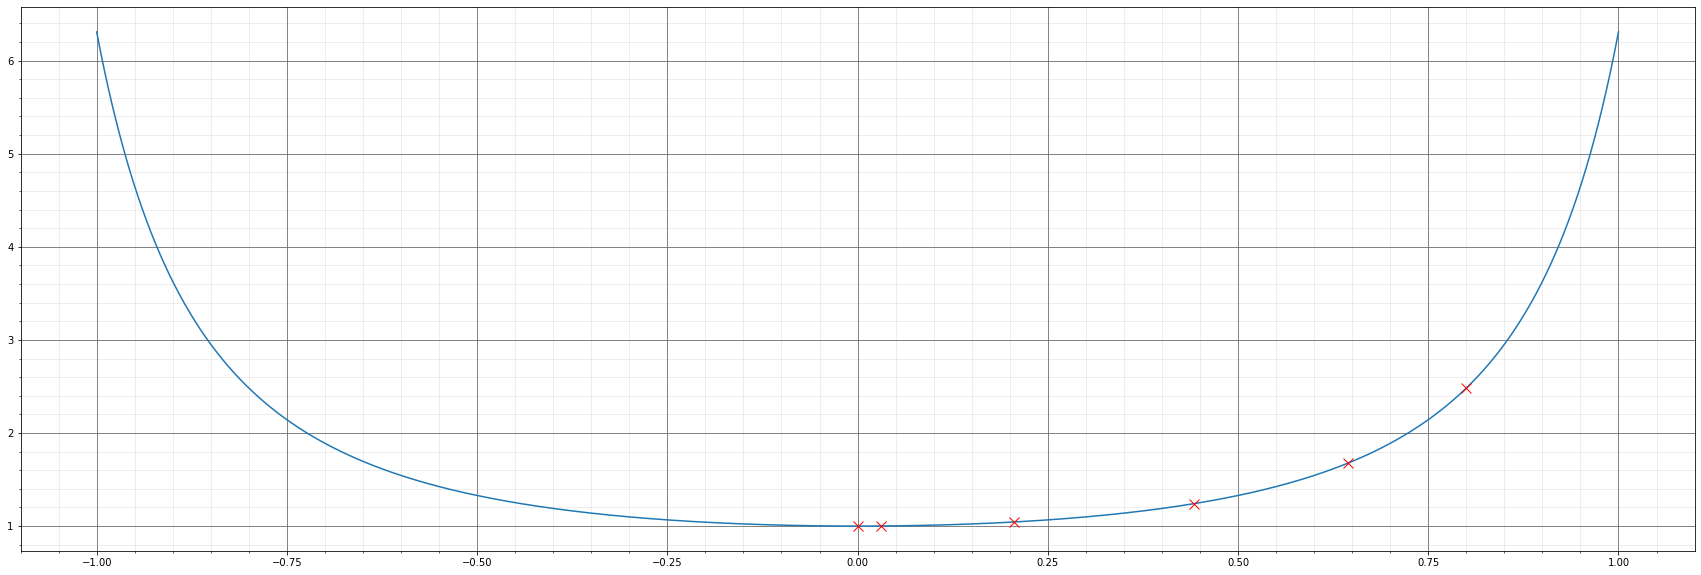

In [44]:
f2 = 1/(sin(-x**2)+1)
# f2 = sin(cos(exp(x)))

results_newton = newton(f2,0.8,0.02)
print(results_newton)
print("[x*,f(x*)]",[results_newton[0][-1],results_newton[1][-1]])
plot(f2,-1,1,results_newton[0],results_newton[1])



## False Position Method - Regula Falsi

$$
False\ Position's\ method\ :\  x_{k+1}=x_k-f'(x_k)\times\frac{(x_k-x_{k-1})}{f'(x_k)-f'(x_{k-1})}
$$

In [45]:
def regula_falsi(fct,x0,x1,err=0.005):
  print("Function :",fct)
  fct_prime = fct.diff(x)
  print(fct_prime)

  x_k = x1
  x_k_1 = x0

  f_prime = lambdify(x,fct_prime)
  f = lambdify(x,fct)

  f_prime_xk = f_prime(x_k)
  f_prime_xk_1 = f_prime(x_k_1) 

  res = [[x_k_1,x_k],[f(x_k_1),f(x_k)]]
  while (abs(x_k - x_k_1) > err) and (abs(f_prime_xk) > err):
    x_k1 = x_k-(f_prime_xk * (x_k - x_k_1)/ (f_prime_xk-f_prime_xk_1)  )
    x_k_1 = x_k
    x_k = x_k1

    res[0].append(x_k)
    res[1].append(f(x_k))
    print("x_k: ",x_k)
    print("x_k-1: ",x_k_1)
    f_prime_xk = f_prime(x_k)
    f_prime_xk_1 = f_prime(x_k_1)
    print("f_prime_xk : ",f_prime_xk)
    print("f_prime_xk-1 : ",f_prime_xk_1) 

  if abs(f_prime_xk) < err:
    print([res[0][-1],res[1][-1]])
    return res
  print("ERREUR DE CALCUL")


Function : sin(cos(log(x**(-2))))
2*sin(log(x**(-2)))*cos(cos(log(x**(-2))))/x
x_k:  4.201435750619252
x_k-1:  2.5
f_prime_xk :  -0.07264230062825174
f_prime_xk-1 :  -0.7470084889201561
x_k:  4.384713336954348
x_k-1:  4.201435750619252
f_prime_xk :  -0.04662137293151755
f_prime_xk-1 :  -0.07264230062825174
x_k:  4.713089511781861
x_k-1:  4.384713336954348
f_prime_xk :  -0.00938827143058938
f_prime_xk-1 :  -0.04662137293151755
x_k:  4.795889078198388
x_k-1:  4.713089511781861
f_prime_xk :  -0.001368716294961805
f_prime_xk-1 :  -0.00938827143058938
[4.795889078198388, -0.8414610164501415]
[[2, 2.5, 4.201435750619252, 4.384713336954348, 4.713089511781861, 4.795889078198388], [0.1824296196878658, -0.25592580308185936, -0.8212356607408056, -0.8320942036631437, -0.8410187231864321, -0.8414610164501415]]
[x*,f(x*)] [4.795889078198388, -0.8414610164501415]


<string>:2: RuntimeWarning: divide by zero encountered in power
<string>:2: RuntimeWarning: invalid value encountered in cos


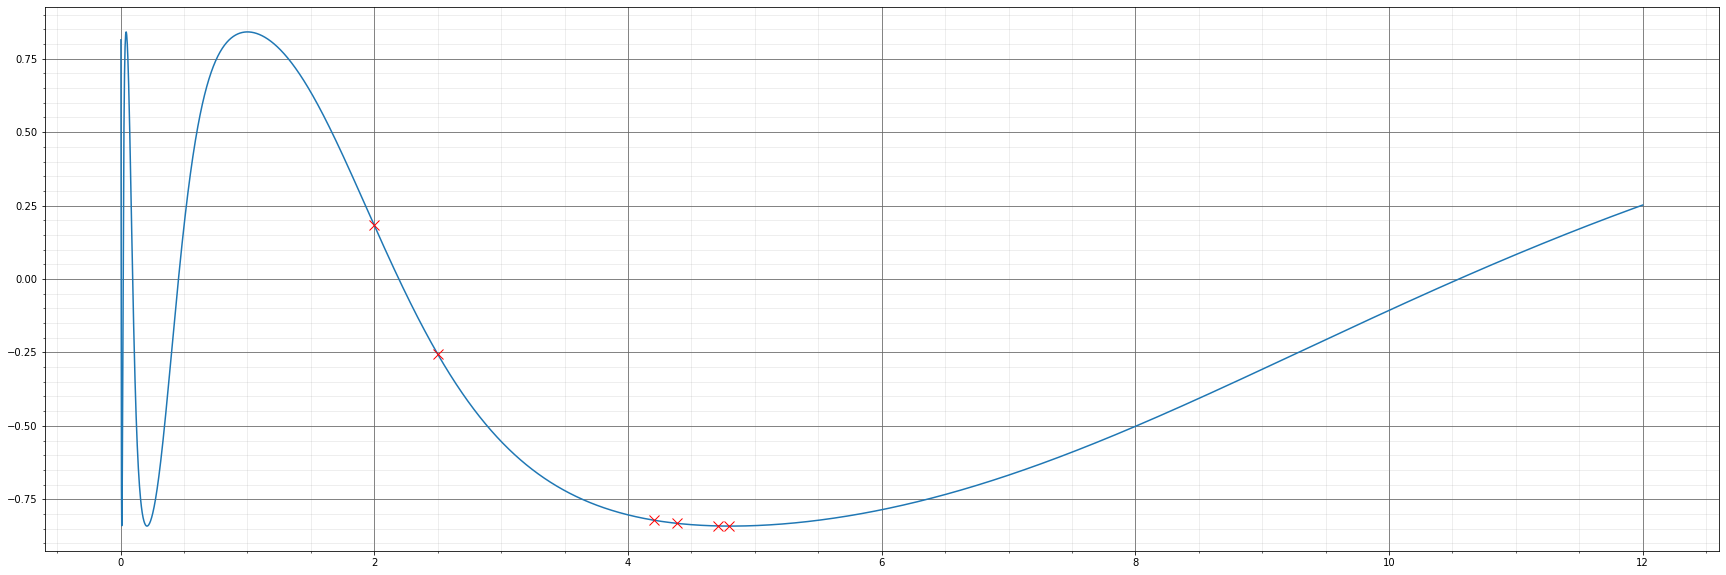

In [46]:
# f2 = 1/(sin(-x**2)+1)
f2 = sin(cos(log(1/x**2)))

results_falsi = regula_falsi(f2,2,2.5)
print(results_falsi)
print("[x*,f(x*)]",[results_falsi[0][-1],results_falsi[1][-1]])
plot(f2,0,12,results_falsi[0],results_falsi[1])



## Bissection - Newton's Method (Hybrid)

In [47]:
def bissection_newton(fct,a,b,err=.05):
  print("\n\nBissection :\n")
  results_biss = bissection(fct,a,b,1)
  [x0,f_x0] = [results_biss[0][-1],results_biss[1][-1]]
  print("\n\nNewton : \n")
  results_nwtn = newton(fct,x0,err)
  return results_nwtn

## Comparison < Newton, Bissection, Hybrid >




 ~~> Newton's Method 

Function : sin(cos(exp(x)))
-exp(x)*sin(exp(x))*cos(cos(exp(x)))
-(exp(x)*sin(exp(x))**2*sin(cos(exp(x))) + exp(x)*cos(exp(x))*cos(cos(exp(x))) + sin(exp(x))*cos(cos(exp(x))))*exp(x)
f'(x0) =  -1.4479845357499241
f''(x0) =  2.8085902184429
Need to be : f'(x0) != 0
cpt =  0
x_k:  1.3155556429135098
f_prime_xk :  1.3838822670028017
f_second_xk :  12.304441808699929
cpt =  1
x_k:  1.2030855050138516
f_prime_xk :  0.3469763685803648
f_second_xk :  6.72004880906144
cpt =  2
x_k:  1.1514524918558973
f_prime_xk :  0.036222110045209456
f_second_xk :  5.445428391660469
[x,f(x)] =  [1.1514524918558973, -0.841349656320812]



 ~~> Bissection's Method

Function : sin(cos(exp(x)))
Success
c =  0.85
f'(c) =  -1.2911707786174467
c =  1.275
f'(c) =  0.9345908311554229
c =  1.0625
f'(c) =  -0.40186270920626915
c =  1.16875
f'(c) =  0.13326402004456356
c =  1.115625
f'(c) =  -0.1493145410816512
c =  1.1421875
f'(c) =  -0.013506376215777379
2D: [x,f(x)] ==  [1.1421875, -0.841453

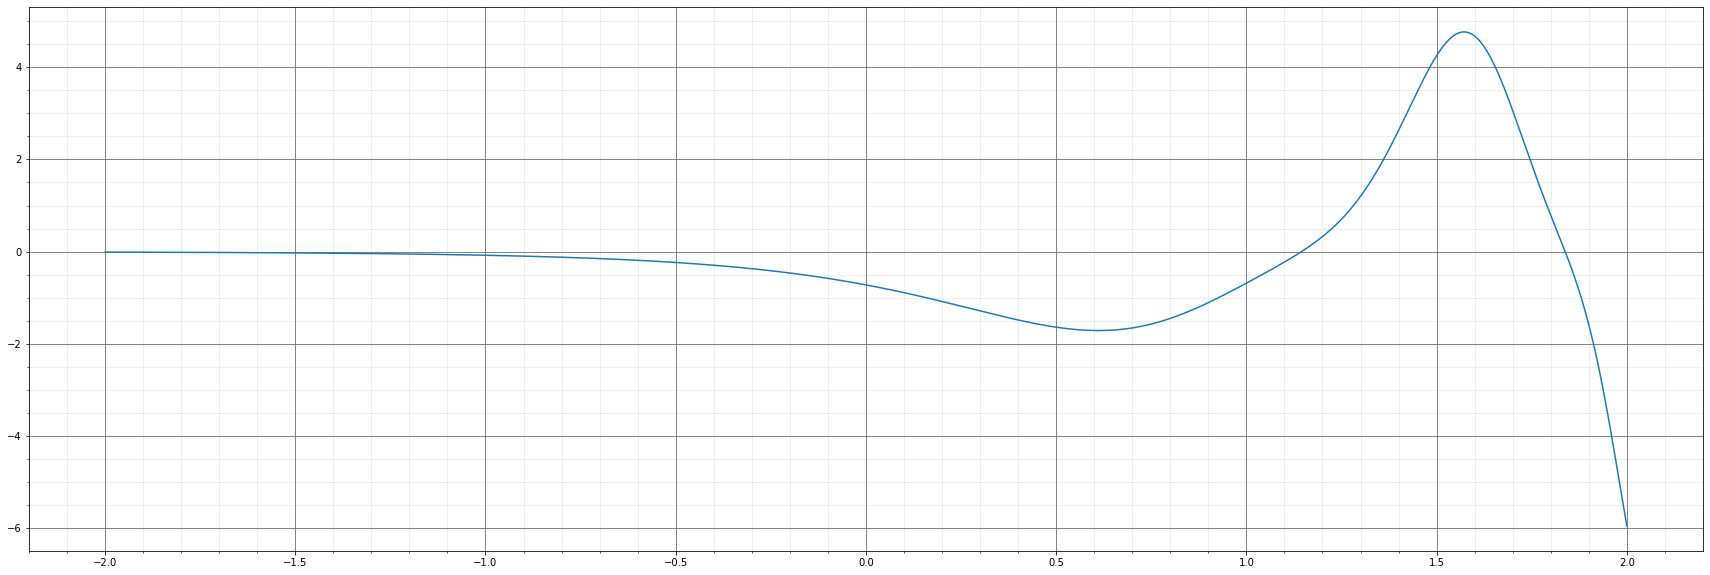

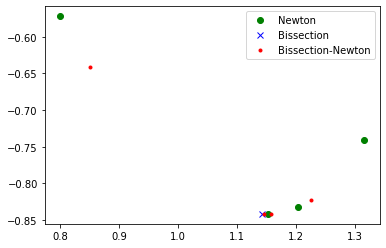

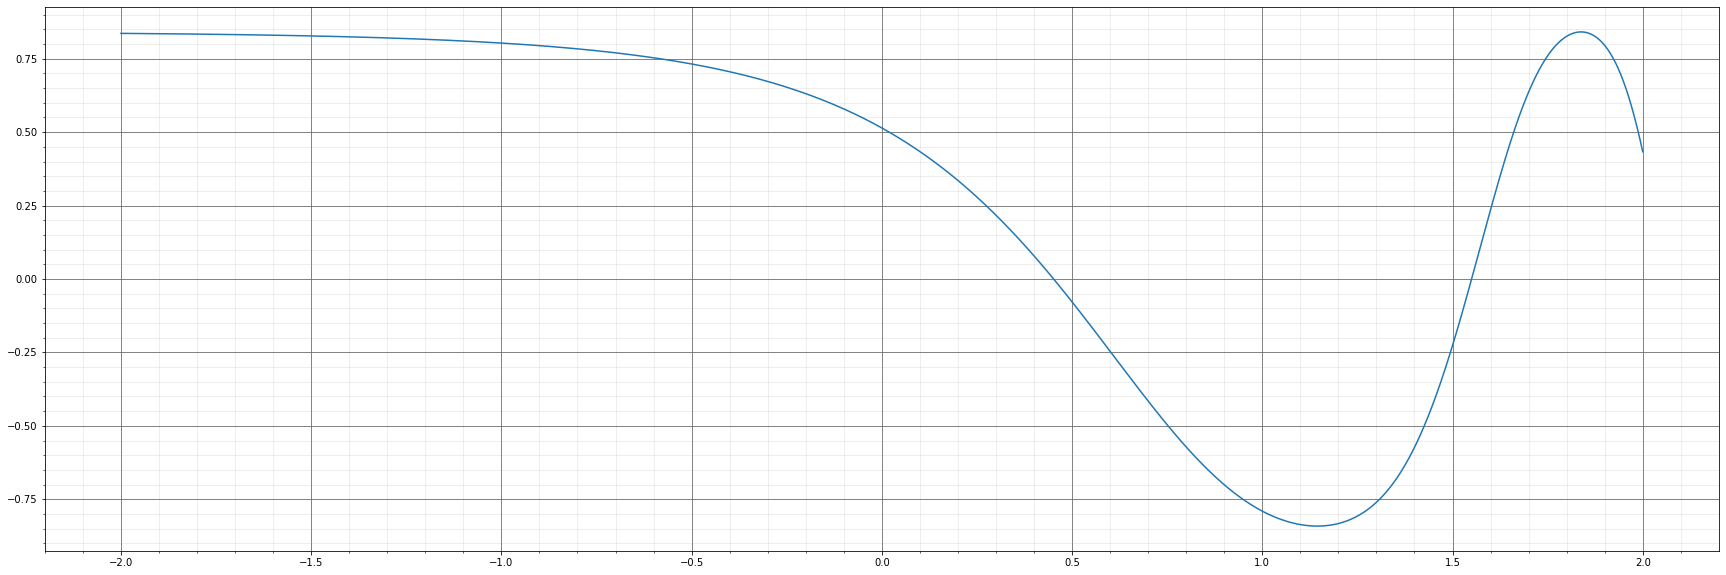

In [48]:

f3 = sin(cos(exp(x)))
f3_prime = -exp(x)*sin(exp(x))*cos(cos(exp(x)))

print("\n\n\n ~~> Newton's Method \n")
nwtn = newton(f3,0.8)
# result: 1.1494460852213106, -0.8414113953797868
#         f'(x*) = 0.02533145117663931

print("\n\n\n ~~> Bissection's Method\n")
biss = bissection(f3,0,1.7,verbose=True)
# result: 1.1421875, -0.8414537940888557
#         f'(x*) = -0.013506376215777379

print("\n\n\n ~~> Bissection-Newton's Method\n")
biss_nwtn = bissection_newton(f3,-2,1.8) # Precise et nous donne une marge plus grande pour choisir les points initiaux 
# result: 1.1450208128703885, -0.8414707590717263
#         f'(x*) = 0.0015520666672475564

plot(f3_prime,-2,2)
plt.plot(nwtn[0],nwtn[1],'og',label="Newton") # Newton
plt.plot(biss[0][-1],biss[1][-1],'xb',label="Bissection")  # Bissection
plt.plot(biss_nwtn[0],biss_nwtn[1],'.r',label="Bissection-Newton") # Bissection-Newton
plt.legend()
plot(f3,-2,2)